In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import numpy as np
import glob

from topological_metrics import *
from utils import *

In [2]:
dataset = "pr_school";gap = 300;state_gap = 1200;nb_states_L = 3;nb_states_e = 8
#dataset = "h_school11";gap = 1200;state_gap = 1200;nb_states_L = 3;nb_states_e = 7
#dataset = "h_school13";gap = 1200;state_gap = 1200;nb_states_L = 4;nb_states_e = 29
#dataset = "InVS15"; gap = 3600; state_gap = 3600; nb_states_L = 3;nb_states_e = 12
#dataset = "hypertext";gap = 1200;state_gap = 1200;nb_states_L = 3;nb_states_e = 20

# Load graphs

In [3]:
edgelist_D = pd.read_csv("Datasets/"+dataset+".dat",sep=" ",names=["t","i","j"])
graph_D = build_graphs(edgelist_D,gap)

# Generated 

In [4]:
d = 2

In [5]:
path = "Generated_graphs/d%d/"%d

### E

In [6]:
directory = path+"%s_E_gap_%d_%d_states_e/"%(dataset,gap,nb_states_e)

runs_E = len(glob.glob1(directory,"*.dat"))
print('runs',runs_E)
graph_E_list = []
for n in range(runs_E):
    data_in = pd.read_csv(directory+"/%d.dat"%n,sep=" ",names=["t","i","j"])
    graph_E_list.append(build_graphs(data_in,gap))

runs 10


### ES

In [7]:
directory = path+"%s_ES_gap_%d_%d_states_e_%d_states_L/"%(dataset,gap,nb_states_e,nb_states_L)

runs_ES = len(glob.glob1(directory,"*.dat"))
print('runs',runs_ES)
graph_ES_list = []
for n in range(runs_ES):
    data_in = pd.read_csv(directory+"/%d.dat"%n,sep=" ",names=["t","i","j"])
    graph_ES_list.append(build_graphs(data_in,gap))

runs 10


## EST

In [8]:
directory = path+"%s_EST_gap_%d_%d_states_e_%d_states_L/"%(dataset,gap,nb_states_e,nb_states_L)

runs_EST = len(glob.glob1(directory,"*.dat"))
print('runs',runs_EST)
graph_EST_list = []
for n in range(runs_EST):
    data_in = pd.read_csv(directory+"/%d.dat"%n,sep=" ",names=["t","i","j"])
    graph_EST_list.append(build_graphs(data_in,gap))

runs 10


# Compute measures

### nb interactions

D

In [9]:
nb_int_D = []
for G in graph_D:
    nb_int_D.append(len(G.edges))

E

In [10]:
nb_int_list = []
for n in range(len(graph_E_list)):
    nb_int = []
    for G in graph_E_list[n]:
        nb_int.append(len(G.edges))
    nb_int_list.append(nb_int)
nb_int_E_m = np.mean(nb_int_list,axis=0)
nb_int_E_s = np.std(nb_int_list,axis=0)


ES

In [11]:
nb_int_list = []
for n in range(len(graph_ES_list)):
    nb_int = []
    for G in graph_ES_list[n]:
        nb_int.append(len(G.edges))
    nb_int_list.append(nb_int)
nb_int_ES_m = np.mean(nb_int_list,axis=0)
nb_int_ES_s = np.std(nb_int_list,axis=0)


EST

In [12]:
nb_int_list = []
for n in range(len(graph_EST_list)):
    nb_int = []
    for G in graph_EST_list[n]:
        nb_int.append(len(G.edges))
    nb_int_list.append(nb_int)
nb_int_EST_m = np.mean(nb_int_list,axis=0)
nb_int_EST_s = np.std(nb_int_list,axis=0)


### Clustering and modularity

D

In [13]:
clust_D = []
mod_D = []
for G in graph_D:
    clust_D.append(nx.transitivity(G))
    if list(G.edges()) == []:
        mod_D.append(0)
    else:
        classes_part = find_communities_Louvain(G)
        mod_D.append(nx.community.modularity(G, classes_part, weight='weight', resolution=1))        

E

In [14]:
clust_E_m,clust_E_s = clustering_every_layer(graph_E_list)

In [15]:
mod_E_m,mod_E_s = mod_every_layer(graph_E_list)

ES

In [16]:
clust_ES_m,clust_ES_s = clustering_every_layer(graph_ES_list)

In [17]:
mod_ES_m,mod_ES_s = mod_every_layer(graph_ES_list)

EST

In [18]:
clust_EST_m,clust_EST_s = clustering_every_layer(graph_EST_list)

In [19]:
mod_EST_m,mod_EST_s = mod_every_layer(graph_EST_list)

# Save measures

In [20]:
directory = 'figs/figs_data/'
if not os.path.exists(directory):
    os.makedirs(directory)

In [21]:
save_on_npy(nb_int_D,'figs/figs_data/nb_int_%s_D.npy'%(dataset))

for net in ['E','ES','EST']:
    nb_int_m = globals()['nb_int_%s_m'%net]
    nb_int_s = globals()['nb_int_%s_s'%net]
    save_on_npy([nb_int_m,nb_int_s],'figs/figs_data/nb_int_%s_%s.npy'%(dataset,net))


In [22]:
save_on_npy(clust_D,'figs/figs_data/clust_%s_D.npy'%(dataset))

for net in ['E','ES','EST']:
    clust_m = globals()['clust_%s_m'%net]
    clust_s = globals()['clust_%s_s'%net]
    save_on_npy([clust_m,clust_s],'figs/figs_data/clust_%s_%s.npy'%(dataset,net))


In [23]:
save_on_npy(mod_D,'figs/figs_data/mod_%s_D.npy'%(dataset))

for net in ['E','ES','EST']:
    mod_m = globals()['mod_%s_m'%net]
    mod_s = globals()['mod_%s_s'%net]
    save_on_npy([mod_m,mod_s],'figs/figs_data/mod_%s_%s.npy'%(dataset,net))


# Load measures (start from here if already computed and saved)

In [24]:
nb_int_D = np.load('figs/figs_data/nb_int_%s_D.npy'%(dataset),allow_pickle=True)

for net in ['E','ES','EST']:
    nb_int_m,nb_int_s = np.load('figs/figs_data/nb_int_%s_%s.npy'%(dataset,net),allow_pickle=True)
    globals()['nb_int_%s_m'%net] = nb_int_m
    globals()['nb_int_%s_s'%net] = nb_int_s


In [25]:
clust_D = np.load('figs/figs_data/clust_%s_D.npy'%(dataset),allow_pickle=True)

for net in ['E','ES','EST']:
    clust_m,clust_s = np.load('figs/figs_data/clust_%s_%s.npy'%(dataset,net),allow_pickle=True)
    globals()['clust_%s_m'%net] = clust_m
    globals()['clust_%s_s'%net] = clust_s


In [26]:
mod_D = np.load('figs/figs_data/mod_%s_D.npy'%(dataset),allow_pickle=True)

for net in ['E','ES','EST']:
    mod_m,mod_s = np.load('figs/figs_data/mod_%s_%s.npy'%(dataset,net),allow_pickle=True)
    globals()['mod_%s_m'%net] = mod_m
    globals()['mod_%s_s'%net] = mod_s


# Figure

In [27]:
plt.rcParams.update({'font.size': 18})

In [28]:
layers = np.arange(0,len(nb_int_EST_m))
hours = layers*gap/3600

In [29]:
def plots(ax,hours,meas_D,meas_E_m,meas_E_s,meas_ES_m,meas_ES_s,meas_EST_m,meas_EST_s,bottom):
    
    # D
    ax.plot(hours,meas_D,c=D_color,label="D")
    # E
    ax.plot(hours,meas_E_m,c=E_color,label="E")
    ax.fill_between(hours,meas_E_m+meas_E_s,meas_E_m-meas_E_s,color=E_color,alpha=0.3)
    # ES
    ax.plot(hours,meas_ES_m,c=ES_color,label="ES")
    ax.fill_between(hours,meas_ES_m+meas_ES_s,meas_ES_m-meas_ES_s,color=ES_color,alpha=0.3)
    # EST
    ax.plot(hours,meas_EST_m,c=EST_color,label="EST")
    ax.fill_between(hours,meas_EST_m+meas_EST_s,meas_EST_m-meas_EST_s,color=EST_color,alpha=0.3)

    if bottom != False:
        ax.set_ylim(bottom=bottom)
    

In [30]:
len(hours), len(mod_D), len(clust_D),len(graph_D)

(390, 390, 390, 390)

In [31]:
D_color = "#656565"
E_color = '#ffcc5c' 
ES_color = '#88d8b0'  
EST_color = '#ff6f69'

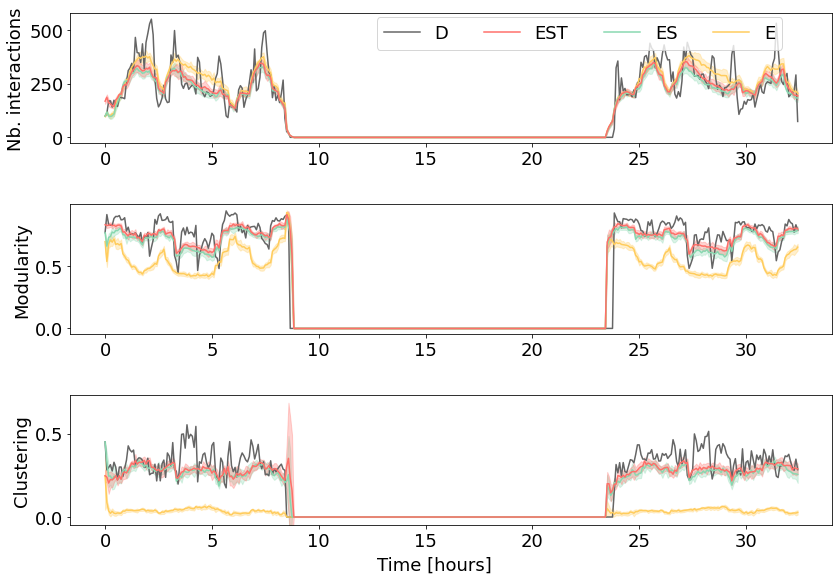

In [32]:
fig, axs = plt.subplots(nrows = 3, ncols = 1,figsize=(12,8))

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]

plots(ax1,hours,
      nb_int_D,
      nb_int_E_m,nb_int_E_s,
      nb_int_ES_m,nb_int_ES_s,
      nb_int_EST_m,nb_int_EST_s,
      bottom=False)
ax1.set_ylabel('Nb. interactions')

plots(ax2,hours,
      mod_D,
      mod_E_m,mod_E_s,
      mod_ES_m,mod_ES_s,
      mod_EST_m,mod_EST_s,
      bottom=False)
ax2.set_ylabel('Modularity')

plots(ax3,hours,
      clust_D,
      clust_E_m,clust_E_s,
      clust_ES_m,clust_ES_s,
      clust_EST_m,clust_EST_s,
      bottom=-0.05)
ax3.set_ylabel('Clustering')

# legend order
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,3,2,1]
fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(0.93, 0.975),ncol=4)

fig.text(0.45, 0, "Time [hours]") # xlabel
fig.tight_layout(w_pad = 0.5,h_pad=2)
plt.savefig('figs/fig1_%s.pdf'%(dataset),bbox_inches='tight')
plt.show()